In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score,accuracy_score
from sklearn.metrics import roc_curve, auc

In [ ]:
data1=pd.read_csv("/content/diabetes_012_health_indicators_BRFSS2015.csv")
data2=pd.read_csv("/content/diabetes_binary_5050split_health_indicators_BRFSS2015.csv")

In [ ]:
df=pd.concat([data1, data2], ignore_index=True)

In [ ]:
data1.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [ ]:
data2.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [ ]:
df

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0,NaN
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0,NaN
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0,NaN
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0,NaN
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234468,NaN,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0,1.0
234469,NaN,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0,1.0
234470,NaN,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0,1.0
234471,NaN,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0,1.0


In [ ]:
df.isnull().sum()

Diabetes_012             70692
HighBP                       0
HighChol                     0
CholCheck                    0
BMI                          0
Smoker                       0
Stroke                       0
HeartDiseaseorAttack         0
PhysActivity                 0
Fruits                       0
Veggies                      0
HvyAlcoholConsump            0
AnyHealthcare                0
NoDocbcCost                  0
GenHlth                      1
MentHlth                     1
PhysHlth                     1
DiffWalk                     1
Sex                          1
Age                          1
Education                    1
Income                       1
Diabetes_binary         163781
dtype: int64

In [ ]:
df['Diabetes_012'].unique()

array([ 0.,  2.,  1., nan])

In [ ]:
df1=df.drop(['Diabetes_binary'],axis='columns')

In [ ]:
df1

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234468,NaN,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0
234469,NaN,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
234470,NaN,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
234471,NaN,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0


In [ ]:
df1.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [ ]:
df1.isnull().sum()

Diabetes_012            70692
HighBP                      0
HighChol                    0
CholCheck                   0
BMI                         0
Smoker                      0
Stroke                      0
HeartDiseaseorAttack        0
PhysActivity                0
Fruits                      0
Veggies                     0
HvyAlcoholConsump           0
AnyHealthcare               0
NoDocbcCost                 0
GenHlth                     1
MentHlth                    1
PhysHlth                    1
DiffWalk                    1
Sex                         1
Age                         1
Education                   1
Income                      1
dtype: int64

In [ ]:
df1.isna().sum()

Diabetes_012            70692
HighBP                      0
HighChol                    0
CholCheck                   0
BMI                         0
Smoker                      0
Stroke                      0
HeartDiseaseorAttack        0
PhysActivity                0
Fruits                      0
Veggies                     0
HvyAlcoholConsump           0
AnyHealthcare               0
NoDocbcCost                 0
GenHlth                     1
MentHlth                    1
PhysHlth                    1
DiffWalk                    1
Sex                         1
Age                         1
Education                   1
Income                      1
dtype: int64

In [ ]:
df1.shape

(234473, 22)

In [ ]:
df2 = df1.dropna(subset=['Diabetes_012','PhysHlth','DiffWalk','Sex','Age','Education','Income'])

In [ ]:
df2

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163775,0.0,0.0,0.0,1.0,21.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,3.0,5.0,8.0
163776,0.0,0.0,1.0,1.0,22.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,5.0,0.0,0.0,1.0,2.0,6.0,8.0
163777,2.0,0.0,1.0,1.0,33.0,0.0,0.0,0.0,1.0,1.0,...,1.0,1.0,3.0,5.0,2.0,0.0,1.0,5.0,6.0,8.0
163778,0.0,0.0,0.0,1.0,20.0,1.0,0.0,0.0,1.0,1.0,...,1.0,1.0,2.0,0.0,30.0,0.0,0.0,10.0,6.0,2.0


In [ ]:
df2['Diabetes_012'].unique()

array([0., 2., 1.])

In [ ]:
df2.shape

(163780, 22)

In [ ]:
df2.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [ ]:
df3=df2.drop(['AnyHealthcare','NoDocbcCost','Sex','Age','Education','Income'],axis='columns')

In [ ]:
df3

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,30.0,30.0,1.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163775,0.0,0.0,0.0,1.0,21.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0
163776,0.0,0.0,1.0,1.0,22.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,2.0,5.0,0.0,0.0
163777,2.0,0.0,1.0,1.0,33.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,5.0,2.0,0.0
163778,0.0,0.0,0.0,1.0,20.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,30.0,0.0


# **Splitting it into Training,Testing and Validation datasets**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X=df3.drop(['Diabetes_012'],axis='columns')

In [ ]:
y=df3['Diabetes_012']

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# **Using Cross-Validation to find the best model**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [ ]:
from sklearn import model_selection
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
def best_model(X,y):
  models={
       'logistic_regression' : {
            'model':LogisticRegression(),
            'params': {
                'fit_intercept': [True, False],
                'penalty':['none','l1','l2'],
                'max_iter':[200],
                'dual':[True,False],
                'multi_class':['ovr','multinomial','auto'],
                'fit_intercept':[True,False],
                'verbose':[100],
                'random_state':[100,42],
            }
        },
       'Decision_Tree_Classifier':{
           'model':DecisionTreeClassifier(),
          'params':{
              'criterion':['entropy','gini','mse'],
              'splitter':['random','best'],
              'random_state':[42],
              'max_depth':[None,3,5,7,10],
              'min_samples_split':[100,42],
              'max_features':['log2','auto','sqrt','log2','None']
          }
       },
       'Random_Forest_Classifier':{
          'model':RandomForestClassifier(),
          'params':{
              'n_estimators':[10,50,100],
              'criterion':['entropy','gini','mse'],
               'max_depth':[None,3,5,7,100],
              'max_features':['log2','auto','sqrt','log2','None'],
              'bootstrap':[True,False],
              'random_state':[42],
              'min_samples_split':[100,2,5,10]
          }
       },
       'Support_Vector_Machine_Classifier':{
          'model':SVC(),
          'params':{
              'kernel':['linear','rbf','sigmoid'],
              'degree':[2,3,4],
              'probability':[True,False],
              'class_weight':['balanced','None'],
              'shrinking':[True,False],
              'C':[0.01, 0.1, 1, 10, 100],
              'gamma':[0.1, 0.01, 0.001]
          }
       }
  }
  scores=[]
  cv = model_selection.KFold(n_splits=5, shuffle=True, random_state=0)
  for model_name, config in models.items():
        rsc = RandomizedSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        rsc.fit(X,y)
        scores.append({
            'model': model_name,
            'best_score': rsc.best_score_,
            'best_params': rsc.best_params_
        })
  return pd.DataFrame(scores,columns=['model','best_score','best_params'])

best_model(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  options={"iprint": iprint, "gtol": tol, "maxiter": max_iter},


[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  options={"iprint": iprint, "gtol": tol, "maxiter": max_iter},


[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.7s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  options={"iprint": iprint, "gtol": tol, "maxiter": max_iter},


[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  options={"iprint": iprint, "gtol": tol, "maxiter": max_iter},


[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    7.2s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  options={"iprint": iprint, "gtol": tol, "maxiter": max_iter},


[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.5s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    6.5s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
45 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    "error_score must be the string 'raise' or a numeric value. "
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    Fitted estimator.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 59, in _check_solver
    )
ValueError: Solver lbfgs supports only dual=False, got dual=

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    8.4s


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  # Determine output settings
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  # Determine output settings
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  # Determine output settings
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`

# **Using Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg_model = LogisticRegression(penalty='none',max_iter=200,dual=False,multi_class='multinomial',fit_intercept=True,verbose=100,random_state=100)

In [ ]:
logreg_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    2.4s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200, multi_class='multinomial', penalty='none',
                   random_state=100, verbose=100)

In [ ]:
y_test_pred = logreg_model.predict(X_test)

In [ ]:
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Accuracy:", val_accuracy)

Accuracy: 0.8453957742037213


In [ ]:
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy:", test_accuracy)

Accuracy: 0.853804502707324


In [ ]:
precision = precision_score(y_test, y_test_pred,average=None)
print("Precision:", precision)

Precision: [0.86368135 0.         0.53524492]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
F1_Score = f1_score(y_test, y_test_pred,average=None)
print("F1_Score:",F1_Score)

F1_Score: [0.91696825 0.         0.26092021]


In [ ]:
recall = recall_score(y_test, y_test_pred,average=None)
print("Recall:", recall)

Recall: [0.97726283 0.         0.17250674]


# **Creating a Confusion Matrix for Logistic Regression**

In [ ]:
cm2 = confusion_matrix(y_test,y_test_pred)

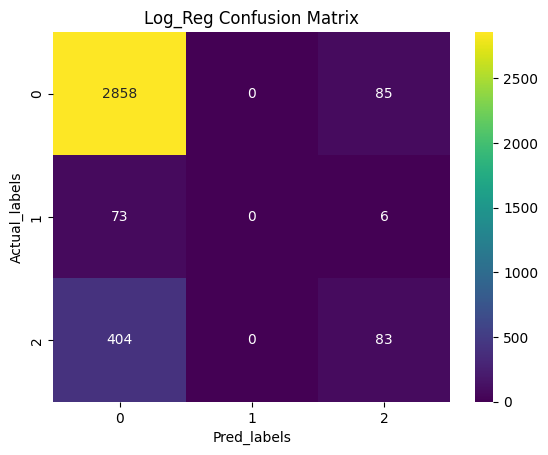

In [ ]:
sns.heatmap(cm2, annot=True, fmt="d", cmap="viridis", cbar=True, xticklabels=True, yticklabels=True)
plt.xlabel("Pred_labels")
plt.ylabel("Actual_labels")
plt.title("Log_Reg Confusion Matrix")
plt.show()

# **Using Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dec_tree_model=DecisionTreeClassifier(criterion='entropy',splitter='random',random_state=42,max_depth=None,min_samples_split=100,max_features='log2')

In [ ]:
dec_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_features='log2',
                       min_samples_split=100, random_state=42,
                       splitter='random')

In [ ]:
y_pred_dec = dec_tree_model.predict(X_test)

In [ ]:
y_val_pred_dec = logreg_model.predict(X_val)

In [ ]:
F1_Score = f1_score(y_val, y_val_pred_dec,average=None)
print("F1_Score:",F1_Score)

Accuracy: 0.8453957742037213


In [ ]:
test_accuracy_dec = accuracy_score(y_test, y_pred_dec)
print("Accuracy:", test_accuracy_dec)

Accuracy: 0.8447913381688216


In [ ]:
precision_dec = precision_score(y_test, y_pred_dec,average=None)
print("Precision:", precision_dec)

Precision: [0.85912492 0.         0.48016701]


In [ ]:
recall = recall_score(y_test, y_pred_dec,average=None)
print("Recall:", recall)

Recall: [0.97943705 0.         0.12748171]


# **Creating a Confusion matrix for decision tree classifier**

In [ ]:
cm_dec2 = confusion_matrix(y_test,y_pred_dec)

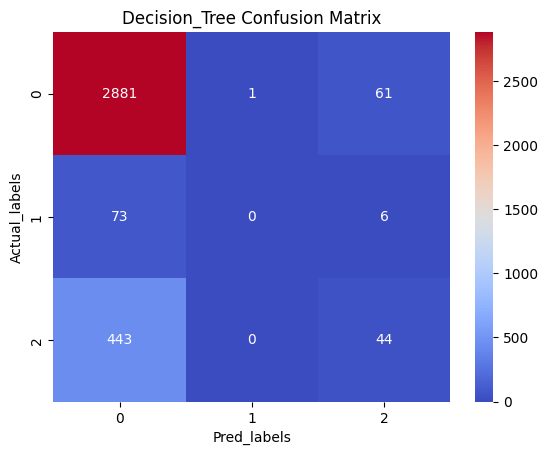

In [ ]:
sns.heatmap(cm_dec2, annot=True, fmt="d", cmap="coolwarm", cbar=True, xticklabels=True, yticklabels=True,linecolor="blue")
plt.xlabel("Pred_labels")
plt.ylabel("Actual_labels")
plt.title("Decision_Tree Confusion Matrix")
plt.show()

# **Using Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_model=RandomForestClassifier(n_estimators=50,criterion='entropy',max_depth=100,max_features='log2',bootstrap=True,random_state=42,min_samples_split=50)

In [ ]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=100, max_features='log2',
                       min_samples_split=50, n_estimators=50, random_state=42)

In [ ]:
y_pred_rf=rf_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy)

Accuracy: 0.8533770304930179


In [ ]:
precision = precision_score(y_test, y_pred_rf,average=None)
print("Precision:", precision)

Precision: [0.86032864 0.         0.61881188]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
F1_Score = f1_score(y_test, y_pred_rf,average=None)
print("F1_Score:",F1_Score)

F1_Score: [0.91991529 0.         0.21570319]


In [ ]:
recall = recall_score(y_test, y_pred_rf,average=None)
print("Recall:", recall)

Recall: [0.98837013 0.         0.13061651]


# **Creating a Confusion Matrix for Random Forest Classifier**

In [ ]:
cm_rf2 = confusion_matrix(y_test,y_pred_rf)

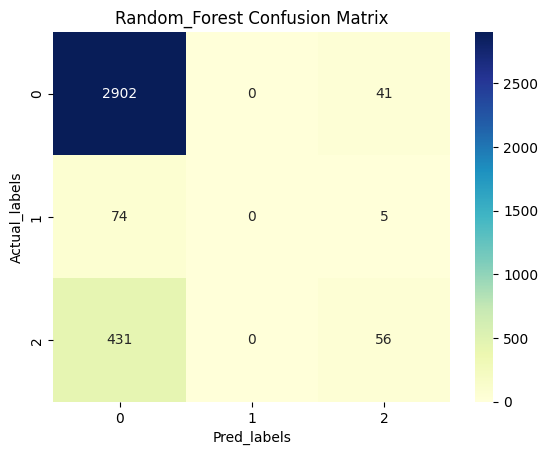

In [ ]:
sns.heatmap(cm_rf2, annot=True, fmt="d", cmap="YlGnBu", cbar=True, xticklabels=True, yticklabels=True,linecolor="green")
plt.xlabel("Pred_labels")
plt.ylabel("Actual_labels")
plt.title("Random_Forest Confusion Matrix")
plt.show()

# **Using Support Vector Machine classifier**

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc_model=SVC(kernel='linear',degree=3,probability=True,class_weight='balanced',shrinking=True)

In [ ]:
svc_model.fit(X_train, y_train)

SVC(class_weight='balanced', kernel='linear', probability=True)

In [ ]:
y_pred_svc=svc_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred_svc)
print("Accuracy:", accuracy)

Accuracy: 0.6614420062695925


In [ ]:
precision = precision_score(y_test, y_pred_svc,average=None)
print("Precision:", precision)

Precision: [0.94855229 0.03759398 0.30036799]


In [ ]:
F1_Score = f1_score(y_test, y_pred_svc,average=None)
print("F1_Score:",F1_Score)

F1_Score: [0.78401899 0.0630517  0.41711913]


In [ ]:
recall = recall_score(y_test, y_pred_svc,average=None)
print("Recall:", recall)

Recall: [0.66812742 0.1953125  0.68234065]


# **Creating a Confusion Matrix for Support Vector Machine classifier**

In [ ]:
cm_svc2 = confusion_matrix(y_test,y_pred_svc)

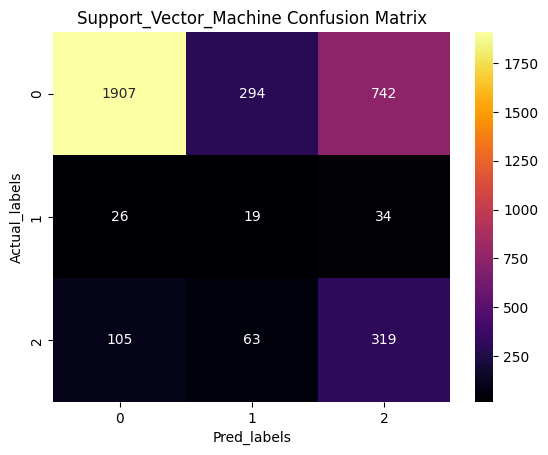

In [ ]:
sns.heatmap(cm_svc2, annot=True, fmt="d", cmap="inferno", cbar=True, xticklabels=True, yticklabels=True,linecolor="black")
plt.xlabel("Pred_labels")
plt.ylabel("Actual_labels")
plt.title("Support_Vector_Machine Confusion Matrix")
plt.show()

# **Using Naive Bayes Classifier**

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_model=GaussianNB()

In [ ]:
nb_model.fit(X_train,y_train)

GaussianNB()

In [ ]:
y_pred_nb=nb_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred_nb)
print("Accuracy:", accuracy)

Accuracy: 0.76831005984611


In [ ]:
precision = precision_score(y_test, y_pred_nb,average=None)
print("Precision:", precision)

Precision: [0.903447   0.         0.32332708]


In [ ]:
F1_Score = f1_score(y_test, y_pred_nb,average=None)
print("F1_Score:",F1_Score)

F1_Score: [0.86062318 0.         0.40453834]


In [ ]:
recall = recall_score(y_test, y_pred_nb,average=None)
print("Recall:", recall)

Recall: [0.82167538 0.         0.54022989]


# **Creating a Confusion Matrix for Naive Bayes Classifier**

In [ ]:
cm_nb2 = confusion_matrix(y_test,y_pred_nb)

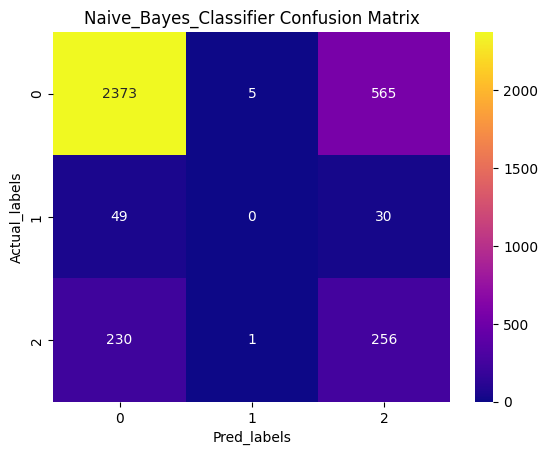

In [ ]:
sns.heatmap(cm_nb2, annot=True, fmt="d", cmap="plasma", cbar=True, xticklabels=True, yticklabels=True,linecolor="magenta")
plt.xlabel("Pred_labels")
plt.ylabel("Actual_labels")
plt.title("Naive_Bayes_Classifier Confusion Matrix")
plt.show()